# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:

ID:

Team Mate name :

ID:

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [5]:
df_cc = pd.read_csv("C:/Users/divya/Downloads/assignment4-1.zip/assignment4/CC GENERAL.csv")
df_clg = pd.read_csv("C:/Users/divya/Downloads/assignment4-1.zip/assignment4/College.csv")
df_cd = pd.read_csv("C:/Users/divya/Downloads/assignment4-1.zip/assignment4/clusteringdata.csv")
df_wine = pd.read_csv("C:/Users/divya/Downloads/assignment4-1.zip/assignment4/wine-clustering.csv")
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df_clg.shape

(777, 19)

In [7]:
df_wine.shape

(178, 13)

In [8]:
df_cd.NativeCountry.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland'], dtype=object)

In [9]:
df_cd

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df= df_cd.apply(le.fit_transform)
df

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,22,6,576,9,12,4,1,1,4,1,16,0,37,37,0
1,33,5,633,9,12,2,4,0,4,1,0,0,12,37,0
2,21,3,3093,11,8,0,6,1,4,1,0,0,37,37,0
3,36,3,3332,1,6,2,6,0,2,1,0,0,37,37,0
4,11,3,4145,9,12,2,10,5,2,0,0,0,37,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,3,3193,4,2,4,7,4,4,0,0,0,37,24,0
4996,14,3,3604,11,8,2,3,0,4,1,0,0,37,37,1
4997,30,4,3044,11,8,2,3,0,4,1,0,0,37,37,1
4998,9,3,3482,11,8,4,1,1,4,1,0,0,57,37,0


In [11]:
#########################begin code for Task 1-a
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)




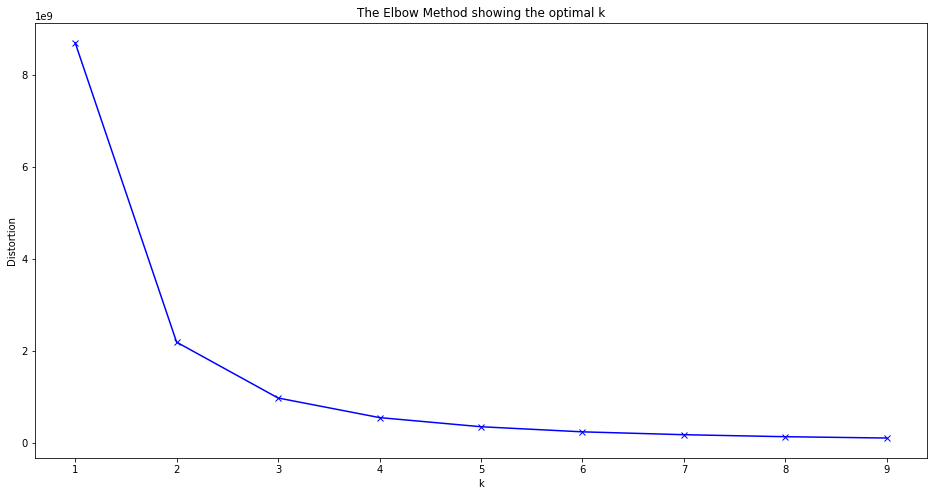

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


#########################begin code for Task 1-a

In [13]:
## Preprocessing on df_cd

from sklearn.preprocessing import StandardScaler

# Standardizing the features
df[['Age', 'Fnlwght', 'CapitalGain', 'HoursPerWeek']] = StandardScaler().fit_transform(df[['Age', 'Fnlwght', 'CapitalGain', 'HoursPerWeek']])
df

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,0.030047,6,-1.296766,9,12,4,1,1,4,1,0.718080,0,-0.047963,37,0
1,0.840938,5,-1.253553,9,12,2,4,0,4,1,-0.277887,0,-2.303547,37,0
2,-0.043670,3,0.611436,11,8,0,6,1,4,1,-0.277887,0,-0.047963,37,0
3,1.062090,3,0.792628,1,6,2,6,0,2,1,-0.277887,0,-0.047963,37,0
4,-0.780843,3,1.408984,9,12,2,10,5,2,0,-0.277887,0,-0.047963,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.324916,3,0.687248,4,2,4,7,4,4,0,-0.277887,0,-0.047963,24,0
4996,-0.559691,3,0.998838,11,8,2,3,0,4,1,-0.277887,0,-0.047963,37,1
4997,0.619786,4,0.574287,11,8,2,3,0,4,1,-0.277887,0,-0.047963,37,1
4998,-0.928278,3,0.906346,11,8,4,1,1,4,1,-0.277887,0,1.756505,37,0


> So the best value for k = 2

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [14]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
X = df.iloc[:,:-1]
y=df["Class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

###################end code for Task 1-b-1

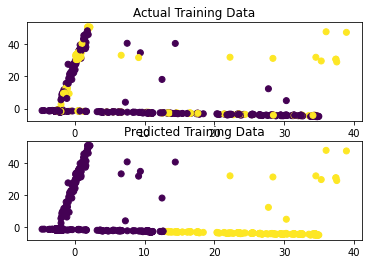

In [15]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
pred_train = kmeans.fit_predict(X_train, y_train)
# Model and fit the data to the PCA model
pca = PCA()
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=pred_train)
###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

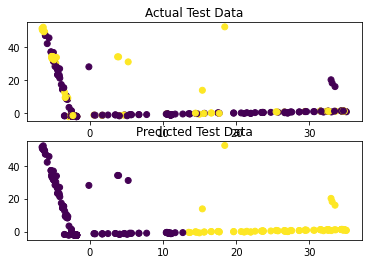

In [16]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
pred_test = kmeans.fit_predict(X_test, y_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

fig, axs = plt.subplots(2)
axs[0].set_title("Actual Test Data")
axs[0].scatter(x,y, c=y_test)
axs[1].set_title("Predicted Test Data")
axs[1].scatter(x,y, c=pred_test)

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [17]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))
###################end code for Task 1-b-4

[[1078   69]
 [ 322   31]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [18]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="cosine"
    )
m1 = model.fit_predict(pdm_train, y_train)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="euclidean"
    )
m2 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="manhattan"
    )
m3 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="cosine"
    )
m4 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="euclidean"
    )
m5 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="manhattan"
    )
m6 = model.fit_predict(pdm_train, y_train)

print("F1-score for complete linkage + cosine", f1_score(y_train, m1))
print("F1-score for complete linkage + euclidean", f1_score(y_train, m2))
print("F1-score for complete linkage + manhattan", f1_score(y_train, m3))
print("F1-score for average linkage + cosine", f1_score(y_train, m4))
print("F1-score for average linkage + euclidean", f1_score(y_train, m5))
print("F1-score for average linkage + manhattan", f1_score(y_train, m6))

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.36749297214413496
F1-score for complete linkage + euclidean 0.03551609322974472
F1-score for complete linkage + manhattan 0.03551609322974472
F1-score for average linkage + cosine 0.370502679254912
F1-score for average linkage + euclidean 0.004597701149425287
F1-score for average linkage + manhattan 0.004597701149425287


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

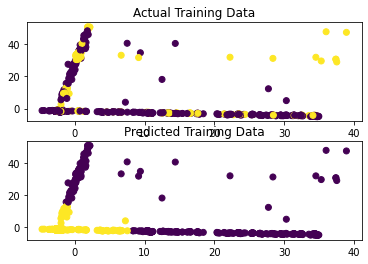

In [19]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=m4)

# Visualize the predicted training labels versus actual training labels. 


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

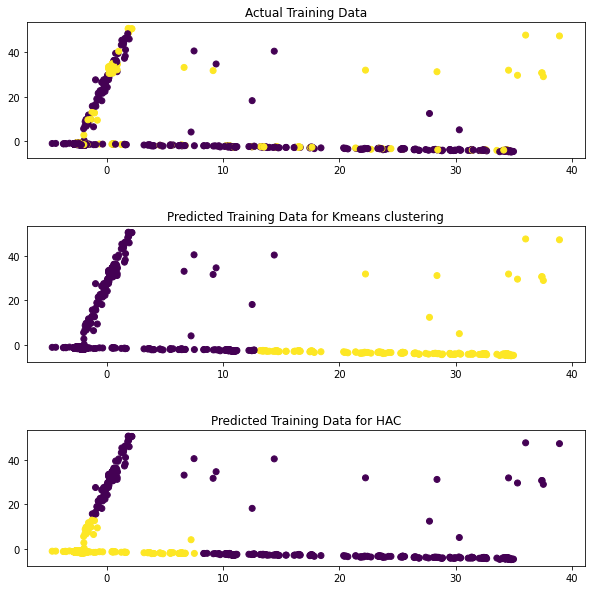

In [29]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data for Kmeans clustering")
axs[1].scatter(x,y, c=pred_train)
axs[2].set_title("Predicted Training Data for HAC")
axs[2].scatter(x,y, c=m4)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [30]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report

print("K-means Clustering Scores")
print(classification_report(y_train, pred_train))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, pred_train))


print("\n\nHierarchical Agglomerative Clustering Scores")
print(classification_report(y_train, m4))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, m4))


###################end code for Task 3-b

K-means Clustering Scores
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      2632
           1       0.26      0.07      0.11       868

    accuracy                           0.72      3500
   macro avg       0.51      0.50      0.47      3500
weighted avg       0.63      0.72      0.65      3500

Confusion matrix:

[[2472  160]
 [ 811   57]]


Hierarchical Agglomerative Clustering Scores
              precision    recall  f1-score   support

           0       0.68      0.12      0.20      2632
           1       0.24      0.84      0.37       868

    accuracy                           0.30      3500
   macro avg       0.46      0.48      0.28      3500
weighted avg       0.57      0.30      0.24      3500

Confusion matrix:

[[ 307 2325]
 [ 142  726]]


## Reasoning:
> K-mean Clustering performance is much better than heirarchical Agglomerative Clustering.

# Dataset 2 

In [31]:
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [32]:
df_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [137]:
for iteam in range (len(df_wine['Alcohol'])):    
    if df_wine['Alcohol'][iteam] > 13.006:
        df_wine['alcohol_mean'][iteam] = 1
    else:
        df_wine['alcohol_mean'][iteam] = 0
df_wine

C:\Users\divya\AppData\Local\Temp\ipykernel_11916\505773360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine['alcohol_mean'][iteam] = 1
C:\Users\divya\AppData\Local\Temp\ipykernel_11916\505773360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine['alcohol_mean'][iteam] = 0


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,alcohol_mean
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [53]:
df_wine['alcohol_mean'].unique()

array([1, 0], dtype=int64)

In [57]:
distortions_1 = []
K_1 = range(1,10)
for k in K_1:
    kmeanModel_1 = KMeans(n_clusters=k)
    kmeanModel_1.fit(df_wine)
    distortions_1.append(kmeanModel.inertia_)
    

C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


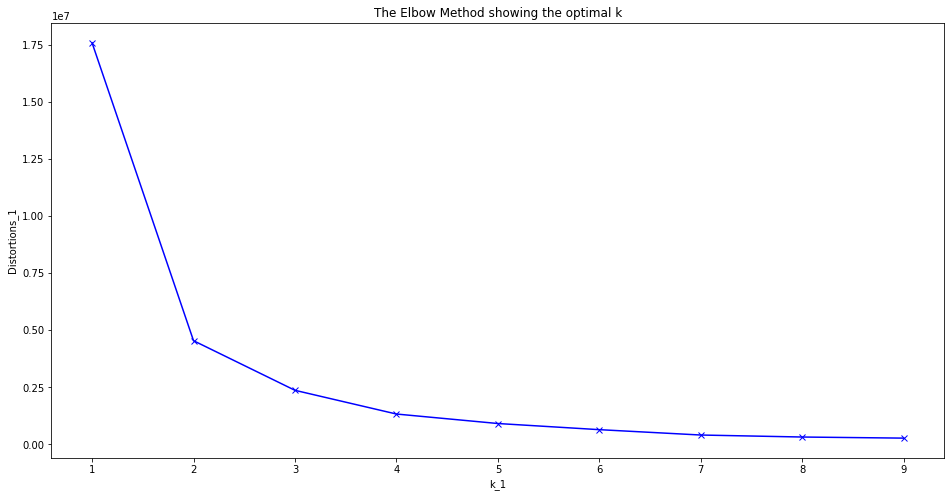

In [58]:
plt.figure(figsize=(16,8))
plt.plot(K_1, distortions, 'bx-')
plt.xlabel('k_1')
plt.ylabel('Distortions_1')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [61]:
X_1 = df_wine.iloc[:,:-1]
y_1= df_wine["alcohol_mean"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=2022)


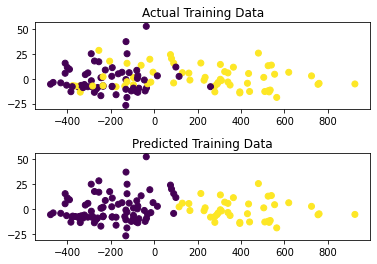

In [64]:
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
pred_train = kmeans.fit_predict(X_train, y_train)
# Model and fit the data to the PCA model
pca = PCA()
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=pred_train)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

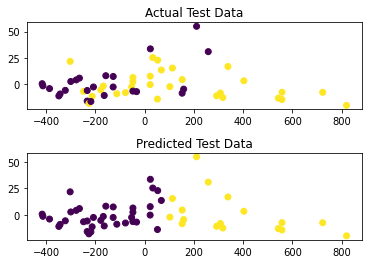

In [65]:
# predict cluster index for each sample 
pred_test = kmeans.fit_predict(X_test, y_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

fig, axs = plt.subplots(2)
axs[0].set_title("Actual Test Data")
axs[0].scatter(x,y, c=y_test)
axs[1].set_title("Predicted Test Data")
axs[1].scatter(x,y, c=pred_test)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))

[[20  4]
 [17 13]]


In [67]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="cosine"
    )
m1 = model.fit_predict(pdm_train, y_train)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="euclidean"
    )
m2 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="manhattan"
    )
m3 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="cosine"
    )
m4 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="euclidean"
    )
m5 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="manhattan"
    )
m6 = model.fit_predict(pdm_train, y_train)

print("F1-score for complete linkage + cosine", f1_score(y_train, m1))
print("F1-score for complete linkage + euclidean", f1_score(y_train, m2))
print("F1-score for complete linkage + manhattan", f1_score(y_train, m3))
print("F1-score for average linkage + cosine", f1_score(y_train, m4))
print("F1-score for average linkage + euclidean", f1_score(y_train, m5))

print("F1-score for average linkage + manhattan", f1_score(y_train, m6))

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.28368794326241137
F1-score for complete linkage + euclidean 0.36
F1-score for complete linkage + manhattan 0.36
F1-score for average linkage + cosine 0.28368794326241137
F1-score for average linkage + euclidean 0.28368794326241137
F1-score for average linkage + manhattan 0.28368794326241137


C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:49

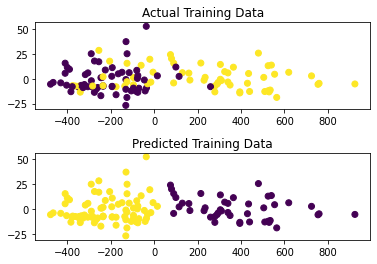

In [69]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=m4)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
# Visualize the predicted training labels versus actual training labels. 


###################end code for Task 2-b

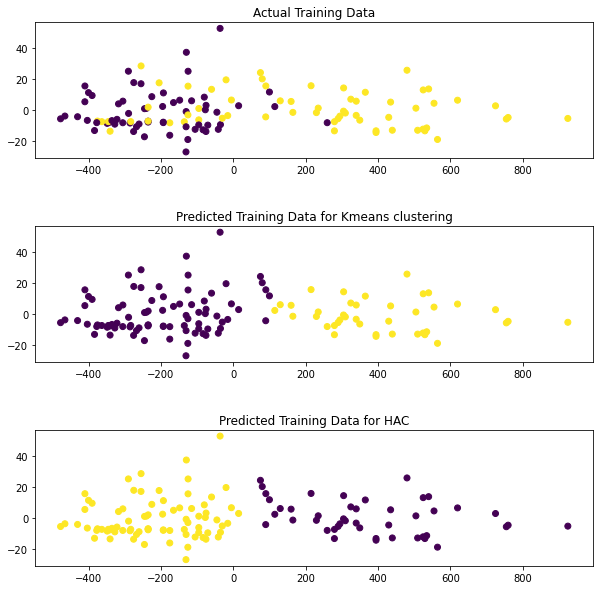

In [70]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data for Kmeans clustering")
axs[1].scatter(x,y, c=pred_train)
axs[2].set_title("Predicted Training Data for HAC")
axs[2].scatter(x,y, c=m4)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

In [71]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report

print("K-means Clustering Scores")
print(classification_report(y_train, pred_train))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, pred_train))


print("\n\nHierarchical Agglomerative Clustering Scores")
print(classification_report(y_train, m4))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, m4))


###################end code for Task 3-b

K-means Clustering Scores
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        62
           1       0.95      0.61      0.75        62

    accuracy                           0.79       124
   macro avg       0.83      0.79      0.78       124
weighted avg       0.83      0.79      0.78       124

Confusion matrix:

[[60  2]
 [24 38]]


Hierarchical Agglomerative Clustering Scores
              precision    recall  f1-score   support

           0       0.07      0.05      0.06        62
           1       0.25      0.32      0.28        62

    accuracy                           0.19       124
   macro avg       0.16      0.19      0.17       124
weighted avg       0.16      0.19      0.17       124

Confusion matrix:

[[ 3 59]
 [42 20]]


#### Reasoning:
> K-mean Clustering performance is much better than heirarchical Agglomerative Clustering.

# Dataset 3

In [72]:
df_cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [74]:
df_cc['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [80]:
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [87]:
df_cc = df_cc.drop('MINIMUM_PAYMENTS', axis=1)

In [88]:
df_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [91]:
df_cc[df_cc['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,0.0,6


In [100]:
df_cc = df_cc.drop(5203)

In [101]:
df_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [105]:
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_DIV
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,0.153732,11.517935,0.968153
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,0.292511,1.337134,0.175603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,6.000000,0.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,0.000000,12.000000,1.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,0.000000,12.000000,1.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,0.142857,12.000000,1.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,1.000000,12.000000,1.000000


In [ ]:
df_cc['TENURE_DIV'] = 1

for iteam in range (len(df_cc['TENURE'])):    
    if df_cc['TENURE'][iteam] > 9:
        df_cc['TENURE_DIV'][iteam] = 1
    else:
        df_cc['TENURE_DIV'][iteam] = 0


In [136]:
len(df_cc["TENURE_DIV"])

8949

In [139]:
df = df_cc.iloc[:, 1:18]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_DIV
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6,1


In [140]:
distortions_2 = []
K_2 = range(1,10)
for k in K_2:
    kmeanModel_2 = KMeans(n_clusters=k)
    kmeanModel_2.fit(df)
    distortions_2.append(kmeanModel.inertia_)
    

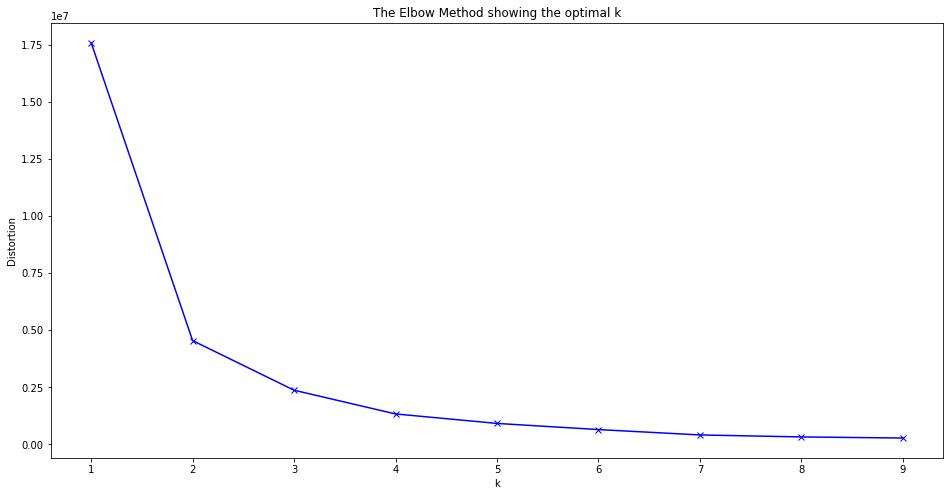

In [145]:
plt.figure(figsize=(16,8))
plt.plot(K_2, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [146]:
X = df.iloc[:,:-1]
y=df["TENURE_DIV"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)


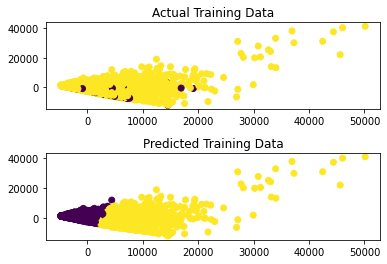

In [151]:
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
pred_train = kmeans.fit_predict(X_train, y_train)
# Model and fit the data to the PCA model
pca = PCA()
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=pred_train)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

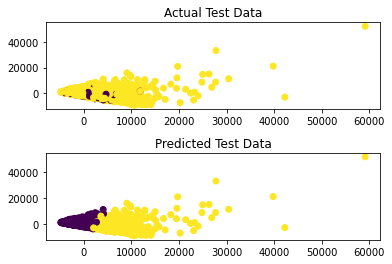

In [152]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
pred_test = kmeans.fit_predict(X_test, y_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

fig, axs = plt.subplots(2)
axs[0].set_title("Actual Test Data")
axs[0].scatter(x,y, c=y_test)
axs[1].set_title("Predicted Test Data")
axs[1].scatter(x,y, c=pred_test)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
###################end code for Task 1-b-3

In [153]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))

[[  76   15]
 [2058  536]]


In [157]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train1 = pairwise_distances(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="cosine"
    )
m11 = model.fit_predict(pdm_train, y_train)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="euclidean"
    )
m21 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="complete", affinity="manhattan"
    )
m31 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="cosine"
    )
m41 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="euclidean"
    )
m5 = model.fit_predict(pdm_train, y_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
model = AgglomerativeClustering(
        n_clusters=2, linkage="average", affinity="manhattan"
    )
m6 = model.fit_predict(pdm_train, y_train)

print("F1-score for complete linkage + cosine", f1_score(y_train, m1))
print("F1-score for complete linkage + euclidean", f1_score(y_train, m2))
print("F1-score for complete linkage + manhattan", f1_score(y_train, m3))
print("F1-score for average linkage + cosine", f1_score(y_train, m4))
print("F1-score for average linkage + euclidean", f1_score(y_train, m5))
print("F1-score for average linkage + manhattan", f1_score(y_train, m6))

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.33746087903116073
F1-score for complete linkage + euclidean 0.9822081403850841
F1-score for complete linkage + manhattan 0.002632444883185258
F1-score for average linkage + cosine 0.7470195999191757
F1-score for average linkage + euclidean 0.9817945383615084
F1-score for average linkage + manhattan 0.002632444883185258


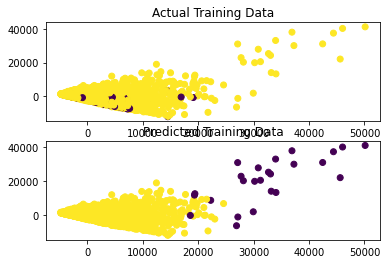

In [158]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
X_train_pca =  pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, axs = plt.subplots(2)
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data")
axs[1].scatter(x,y, c=m21)

# Visualize the predicted training labels versus actual training labels. 


###################end code for Task 2-b

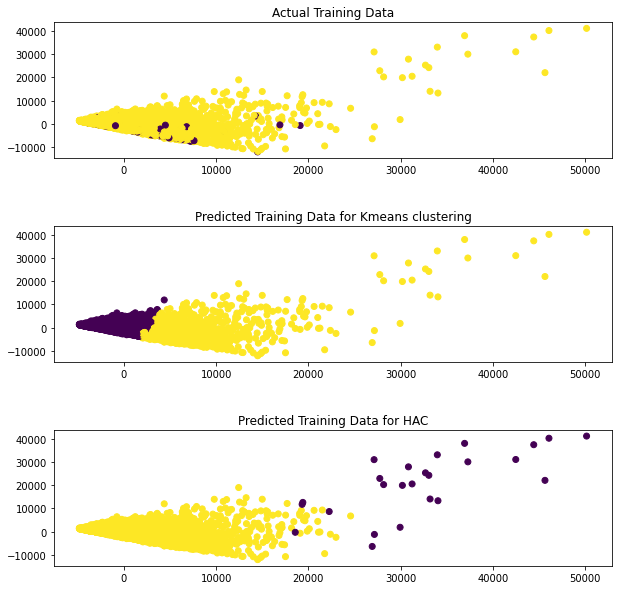

In [161]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].set_title("Actual Training Data")
axs[0].scatter(x,y, c=y_train)
axs[1].set_title("Predicted Training Data for Kmeans clustering")
axs[1].scatter(x,y, c=pred_train)
axs[2].set_title("Predicted Training Data for HAC")
axs[2].scatter(x,y, c=m21)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [162]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report

print("K-means Clustering Scores")
print(classification_report(y_train, pred_train))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, pred_train))


print("\n\nHierarchical Agglomerative Clustering Scores")
print(classification_report(y_train, m4))

print("Confusion matrix:\n")
print(confusion_matrix(y_train, m4))


###################end code for Task 3-b

K-means Clustering Scores
              precision    recall  f1-score   support

           0       0.03      0.80      0.06       194
           1       0.97      0.21      0.35      6070

    accuracy                           0.23      6264
   macro avg       0.50      0.51      0.21      6264
weighted avg       0.94      0.23      0.34      6264

Confusion matrix:

[[ 155   39]
 [4770 1300]]


Hierarchical Agglomerative Clustering Scores
              precision    recall  f1-score   support

           0       0.03      0.32      0.05       194
           1       0.97      0.61      0.75      6070

    accuracy                           0.60      6264
   macro avg       0.50      0.47      0.40      6264
weighted avg       0.94      0.60      0.73      6264

Confusion matrix:

[[  63  131]
 [2373 3697]]


#### Reasoning:
K-mean Clustering performance is much better than heirarchical Agglomerative Clustering.

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 1 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points